In [1]:
# 한글폰트(나눔) 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
! pip install geopandas

     |████████████████████████████████| 972kB 11.1MB/s 
     |████████████████████████████████| 6.5MB 21.7MB/s 
     |████████████████████████████████| 14.8MB 314kB/s 


In [3]:
! pip install haversine

In [4]:
import pandas as pd
import folium
from folium import plugins
from shapely.geometry import Point
from haversine import haversine, Unit
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pathlib
import os

from sklearn.preprocessing import MinMaxScaler

from shapely.geometry import Point

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='NanumBarunGothic')

In [5]:
path = "/content/drive/MyDrive/compas/data/"
save_path = "/content/drive/MyDrive/compas/"

In [6]:
# load data
주정차단속 = pd.read_csv(path+'1.오산시_주정차단속(2018~2020).csv',encoding="utf-8")
어린이교통사고_격자 = gpd.read_file(path+'2.오산시_어린이교통사고_격자 - 복사본.geojson', encoding="utf-8")
차량등록현황_격자 = gpd.read_file(path+'3.오산시_차량등록현황_격자.geojson', encoding="utf-8")
거주인구격자_총인구 = gpd.read_file(path+'4.오산시_연령별_거주인구격자(총인구).geojson', encoding="utf-8")
거주인구격자_유소년 = gpd.read_file(path+'5.오산시_연령별_거주인구격자(유소년).geojson', encoding="utf-8")
거주인구격자_생산가능 = gpd.read_file(path+'6.오산시_연령별_거주인구격자(생산가능인구).geojson', encoding="utf-8")
거주인구격자_고령 = gpd.read_file(path+'7.오산시_연령별_거주인구격자(고령).geojson', encoding="utf-8")
유동인구 = pd.read_csv(path+'8.오산시_유동인구(2019) - 복사본.csv',encoding="utf-8")
어린이보호구역 = pd.read_csv(path+'9.오산시_어린이보호구역.csv',encoding="utf-8")
학교위치정보 = pd.read_csv(path+'10.오산시_학교위치정보.csv',encoding="utf-8")
초등학교_통학구 = gpd.read_file(path+'11.오산시_초등학교_통학구.geojson', encoding="utf-8")
중학교_학군 = gpd.read_file(path+'12.오산시_중학교_학군.geojson', encoding="utf-8")
어린이집_유치원현황 = pd.read_csv(path+'13.오산시_어린이집_유치원현황.csv',encoding="utf-8")
기상데이터 = pd.read_csv(path+'14.오산시_기상데이터(2010~2019).csv',encoding="utf-8")
무인교통단속카메라 = pd.read_csv(path+'15.오산시_무인교통단속카메라.csv',encoding="utf-8")
도로안전표지 = pd.read_csv(path+'16.오산시_도로안전표지표준데이터.csv',encoding="utf-8")
횡단보도 = gpd.read_file(path+'17.오산시_횡단보도.geojson', encoding="utf-8")
과속방지턱 = pd.read_csv(path+'18.오산시_과속방지턱표준데이터.csv',encoding="utf-8")
신호등 = gpd.read_file(path+'19.오산시_신호등.geojson', encoding="utf-8")
CCTV설치현황 = pd.read_csv(path+'20.오산시_CCTV설치현황.csv',encoding="utf-8")
인도 = gpd.read_file(path+'21.오산시_인도.geojson', encoding="utf-8")
버스정류장 = pd.read_csv(path+'22.오산시_버스정류장.csv',encoding="utf-8")
상세도로망 = gpd.read_file(path+'23.오산시_상세도로망_LV6.geojson', encoding="utf-8")
시간대별_추정교통량 = pd.read_csv(path+'24.평일_전일,시간대별_오산시_추정교통량_Level6.csv',encoding="utf-8")
혼잡빈도강도 = pd.read_csv(path+'25.평일_전일_오산시_혼잡빈도강도_Level6.csv',encoding="utf-8")
혼잡시간강도 = pd.read_csv(path+'26.평일_전일_오산시_혼잡시간강도_Level6.csv',encoding="utf-8")
도로명주소_건물 = gpd.read_file(path+'27.오산시_도로명주소_건물.geojson', encoding="utf-8")
건물연면적_격자 = gpd.read_file(path+'28.오산시_건물연면적_격자.geojson', encoding="utf-8")
체육시설현황 = pd.read_csv(path+'29.오산시_체육시설현황.csv',encoding="utf-8")
학원_및_교습소_현황 = pd.read_csv(path+'30.오산시_학원 및 교습소 현황.csv',encoding="utf-8")
법정경계_시군구 = gpd.read_file(path+'31.오산시_법정경계(시군구).geojson', encoding="utf-8")
행정경계_읍면동 = gpd.read_file(path+'32.오산시_행정경계(읍면동).geojson', encoding="utf-8")
법정경계_읍면동 = gpd.read_file(path+'33.오산시_법정경계(읍면동).geojson', encoding="utf-8")
지적도 = gpd.read_file(path+'34.오산시_지적도.geojson', encoding="utf-8")
코드정의서 =  pd.read_excel(path+'35.코드정의서.xlsx')

In [7]:
data=pd.read_csv(save_path+"과제2_ver2.csv", encoding='utf-8')

In [8]:
# 지도 고정값
center =[37.1515948, 127.0359805]
zoom =13

In [ ]:
#####################################################################

## 1-3. 어린이보호구역 + 거주유소년인구
- 어린이보호구역 300m내 거주하는 유소년인구수

In [ ]:
거주인구격자_유소년.head(3)

,gid,val,geometry
0,다사551085,NaN,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,NaN,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,NaN,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."


In [ ]:
# 어린이보호구역 300m내에 거주하는 유소년인구 합산
def check_kids(row):
  global 거주인구격자_유소년
  lat = row['보호구역_위도']
  lng = row['보호구역_경도']
  cnt = 0
  for grid in 거주인구격자_유소년.iloc:
    if grid['val'] > 0:
      if haversine((lat, lng), grid['geometry'].centroid.coords[0][::-1], unit="m") <= 300:
        cnt+=grid['val']
  return cnt

data['거주인구_유소년']=data.apply(check_kids, axis=1)

## 1-4. 어린이보호구역 + 등록된 차량 대수
- 어린이보호구역 300m내 등록된 차량 대수 카운트

In [9]:
차량등록현황_격자.head(3)

,gid,car_cnt,geometry
0,다사551085,0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."


In [10]:
차량등록현황_격자.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       4510 non-null   object  
 1   car_cnt   4510 non-null   int64   
 2   geometry  4510 non-null   geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 105.8+ KB


In [11]:
차량등록현황_격자['car_cnt'].describe()

count    4510.000000
mean       24.060310
std       143.776935
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max      3002.000000
Name: car_cnt, dtype: float64

In [13]:
# 어린이보호구역 300m내에 등록된 차량 대수 카운트
def check_cars(row):
  global 차량등록현황_격자
  lat = row['보호구역_위도']
  lng = row['보호구역_경도']
  cnt = 0
  for grid in 차량등록현황_격자.iloc:
    if grid['car_cnt'] > 0:
      if haversine((lat, lng), grid['geometry'].centroid.coords[0][::-1], unit="m") <= 300:
        cnt+=grid['car_cnt']
  return cnt

data['등록차량대수']=data.apply(check_cars, axis=1)

In [ ]:
#########################################################################

In [14]:
data.shape

(91, 21)

In [20]:
data.head(3)

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,주택횟수,어린이교통사고횟수,과속방지턱수,과속cctv수,최대속도30,최대속도50,최대속도60,최대속도70,최대속도80,주정차단속CCTV대수,평균유동인구,이동형CCTV단속횟수,거주인구_유소년,등록차량대수
0,특수학교,성심학교,N,0,25,127.017521,37.176762,3,0,0,0,0,0,1,0,0,0,39.944379,0,0.0,40
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103,22,2,0,0,0,0,0,0,0,0,93.085020,57,521.0,1335
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197,69,8,0,0,6,0,15,0,13,1,904.784352,0,901.0,1509


In [19]:
data.to_csv(save_path+'과제2_ver2.csv', encoding='utf-8', index=False)

In [ ]:
#########################################################################

**세미초등학교 열 drop**

In [17]:
# data[data['시설명']=='세미초등학교']

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,주택횟수,어린이교통사고횟수,과속방지턱수,과속cctv수,최대속도30,최대속도50,최대속도60,최대속도70,최대속도80,주정차단속CCTV대수,평균유동인구,이동형CCTV단속횟수,거주인구_유소년,등록차량대수
23,초등학교,세미초등학교,N,1,15,127.064386,37.174482,35,8,1,0,0,0,8,0,1,0,284.035271,0,1714.0,2226


In [18]:
# data=data.drop(data.index[23])
# data.shape

(90, 21)

# 2. 교통안전시설물 설치 후보지 선정

## 2-1. 컬럼 선정

In [21]:
col_list=['시설명', '보호구역_경도', '보호구역_위도', '시설종류', 
          #'CCTV설치여부', 
          'CCTV설치대수', 
      '보호구역도로폭', '어린이교통사고횟수', '과속방지턱수',
      # '과속cctv수', '주정차단속CCTV대수', 
      '이동형CCTV단속횟수', '평균유동인구', '거주인구_유소년', '등록차량대수']
data2=data[col_list]

data2.head(3)

,시설명,보호구역_경도,보호구역_위도,시설종류,CCTV설치대수,보호구역도로폭,어린이교통사고횟수,과속방지턱수,이동형CCTV단속횟수,평균유동인구,거주인구_유소년,등록차량대수
0,성심학교,127.017521,37.176762,특수학교,0,25,0,0,0,39.944379,0.0,40
1,가수초등학교,127.047957,37.148103,초등학교,1,12,2,0,57,93.085020,521.0,1335
2,광성초등학교,127.039709,37.184197,초등학교,2,12,8,0,0,904.784352,901.0,1509


In [22]:
data2.describe()

,보호구역_경도,보호구역_위도,CCTV설치대수,보호구역도로폭,어린이교통사고횟수,과속방지턱수,이동형CCTV단속횟수,평균유동인구,거주인구_유소년,등록차량대수
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,127.062605,37.156712,1.155556,8.422222,8.400000,0.466667,1.955556,622.285441,519.466667,1641.033333
std,0.015249,0.018001,0.806032,4.773470,7.026115,0.876664,8.309885,421.468969,458.691133,1183.662251
min,127.017521,37.127317,0.000000,3.000000,0.000000,0.000000,0.000000,27.610148,0.000000,23.000000
25%,127.053071,37.141175,1.000000,6.000000,3.000000,0.000000,0.000000,297.546506,159.000000,793.250000
50%,127.065259,37.154981,1.000000,6.000000,6.000000,0.000000,0.000000,568.996966,378.000000,1466.000000
75%,127.072374,37.164735,1.750000,12.000000,14.000000,1.000000,1.000000,849.347125,781.500000,2072.250000
max,127.090958,37.197877,3.000000,25.000000,27.000000,3.000000,57.000000,1800.153568,1671.000000,5232.000000


## 2-2. 데이터 전처리 & 스코어 데이터프레임 생성

In [23]:
# 스코어 데이터프레임 생성
score=pd.DataFrame()
score['시설명']=data2['시설명']
score['보호구역_경도']=data2['보호구역_경도']
score['보호구역_위도']=data2['보호구역_위도']

### **시설종류**
* 특수학교 -> 0
* 어린이집 -> 1
* 유치원 -> 0.25
* 초등학교 -> 0.5

In [24]:
data2['시설종류'].value_counts()

어린이집    48
초등학교    24
유치원     17
특수학교     1
Name: 시설종류, dtype: int64

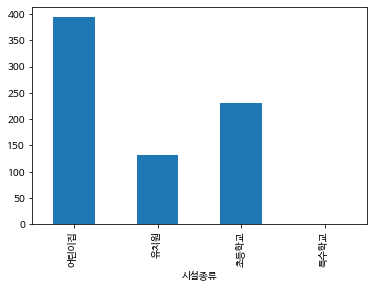

In [25]:
data2.groupby('시설종류').sum()['어린이교통사고횟수'].plot(kind='bar')

In [26]:
data2.groupby('시설종류').sum()['어린이교통사고횟수']

시설종류
어린이집    394
유치원     132
초등학교    230
특수학교      0
Name: 어린이교통사고횟수, dtype: int64

In [27]:
score['시설종류']=data2['시설종류'].map({'어린이집':1, '초등학교': 0.5, '유치원': 0.25,'특수학교': 0})

### **CCTV설치대수**
* 0대 -> 1점
* 1대 -> 0.7점
* 2대 -> 0.5점
* 3대 -> 0점

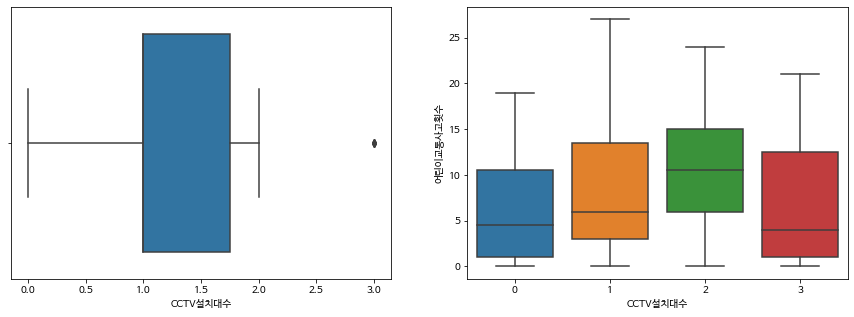

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['CCTV설치대수'], ax=axes[0])
sns.boxplot(data2['CCTV설치대수'], data2['어린이교통사고횟수'], ax=axes[1])

In [29]:
score['CCTV설치대수']=data2['CCTV설치대수'].map({0: 0, 1: 0.2, 2: 1, 3: 0})

### **보호구역도로폭**
* ~6미만 -> 0.2
* 6이상 12이하 -> 1
* 12초과~ -> 0


In [30]:
data2['보호구역도로폭'].describe()

count    90.000000
mean      8.422222
std       4.773470
min       3.000000
25%       6.000000
50%       6.000000
75%      12.000000
max      25.000000
Name: 보호구역도로폭, dtype: float64

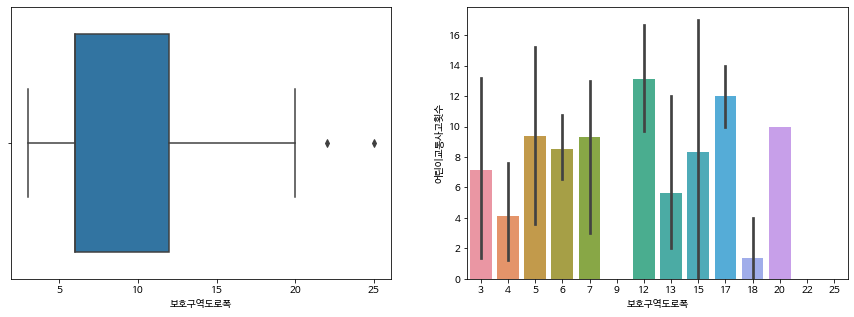

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['보호구역도로폭'], ax=axes[0])
sns.barplot(data2['보호구역도로폭'], data2['어린이교통사고횟수'], ax=axes[1])

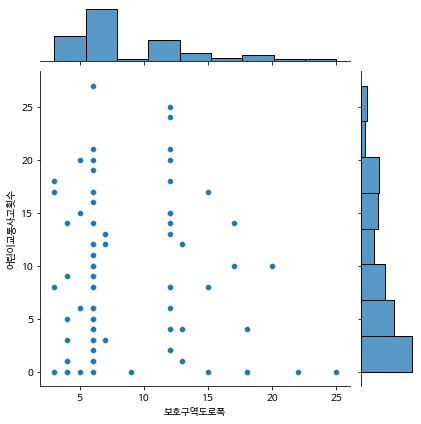

In [32]:
sns.jointplot(data2['보호구역도로폭'], data2['어린이교통사고횟수'])

In [33]:
x1=0
x2=0 # iqr
x3=0
for row in data2.iloc:
  if row['보호구역도로폭'] < 6:
    x1 += row['어린이교통사고횟수']
  elif row['보호구역도로폭'] > 12:
    x3 += row['어린이교통사고횟수']
  else:
    x2 += row['어린이교통사고횟수']
print(x1, x2, x3)

123 553 80


In [34]:
def myfunc1(val):
  if val < 6:
    return 0.2
  elif val > 12:
    return 1
  else:
    return 0

score['보호구역도로폭']=data2['보호구역도로폭'].apply(myfunc1)

### **과속방지턱 수**
* 0개 -> 1
* 1개 -> 0.5
* 2개 -> 0.3
* 3개 -> 0

In [35]:
data2['과속방지턱수'].describe()

count    90.000000
mean      0.466667
std       0.876664
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: 과속방지턱수, dtype: float64

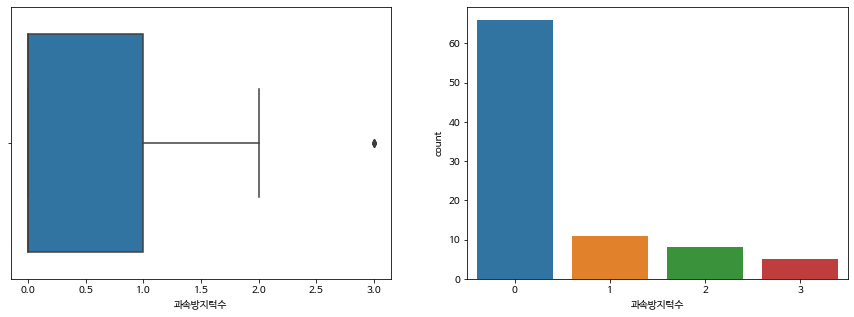

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['과속방지턱수'], ax=axes[0])

sns.countplot(data2['과속방지턱수'], ax=axes[1])

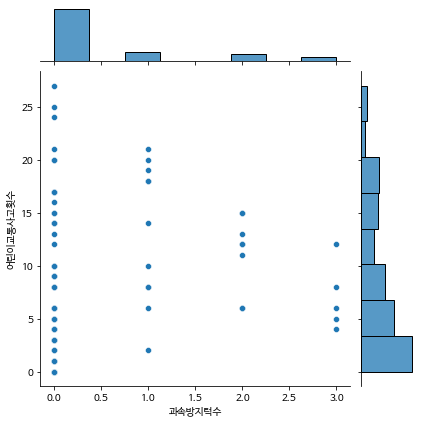

In [37]:
sns.jointplot(data2['과속방지턱수'], data2['어린이교통사고횟수'])

In [38]:
x0=0 # 과속방지턱수 0개
x1=0 # 과속방지턱수 1개
x2=0 # 과속방지턱수 2개
x3=0 # 과속방지턱수 3개
for row in data2.iloc:
  if row['과속방지턱수']==0:
    x0 += row['어린이교통사고횟수']
  elif row['과속방지턱수']==1:
    x1 += row['어린이교통사고횟수']
  elif row['과속방지턱수']==2:
    x2 += row['어린이교통사고횟수']
  else:
    x3 += row['어린이교통사고횟수']
print(x0, x1, x2, x3)

487 144 90 35


In [39]:
score['과속방지턱수']=data2['과속방지턱수'].map({0: 1, 1: 0.4, 2: 0.3, 3: 0})

### **이동형CCTV단속횟수**
* 0번 -> 1
* 1번이상 -> 0

In [40]:
data2['이동형CCTV단속횟수'].describe()

count    90.000000
mean      1.955556
std       8.309885
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      57.000000
Name: 이동형CCTV단속횟수, dtype: float64

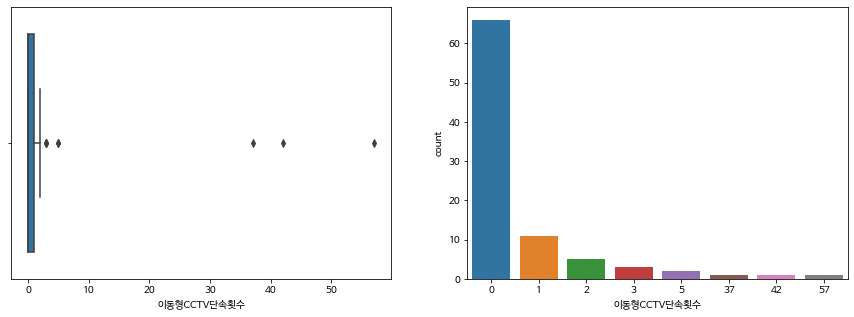

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['이동형CCTV단속횟수'], ax=axes[0])
sns.countplot(data2['이동형CCTV단속횟수'], ax=axes[1])

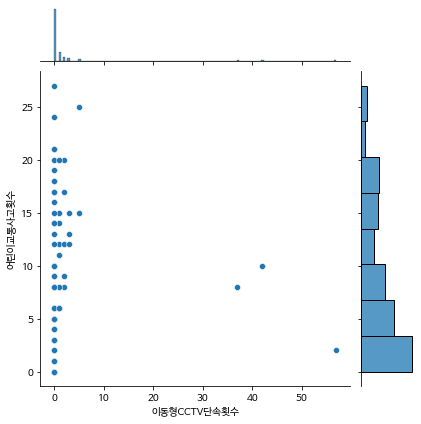

In [42]:
sns.jointplot(data2['이동형CCTV단속횟수'], data2['어린이교통사고횟수'])

In [43]:
x0=0 # 이동형CCTV단속횟수 0번
x1=0 # 이동형CCTV단속횟수 1번 이상
for row in data2.iloc:
  if row['이동형CCTV단속횟수']==0:
    x0 += row['어린이교통사고횟수']
  else:
    x1 += row['어린이교통사고횟수']
print(x0, x1)

480 276


In [44]:
score['이동형CCTV단속횟수']=data2['이동형CCTV단속횟수'].apply(lambda x: 1 if x==0 else 0)

### **평균유동인구**
* ~25%미만 -> 0
* ~75%이하 -> 0.8
* 75%초과~ -> 1

In [45]:
data2['평균유동인구'].describe()

count      90.000000
mean      622.285441
std       421.468969
min        27.610148
25%       297.546506
50%       568.996966
75%       849.347125
max      1800.153568
Name: 평균유동인구, dtype: float64

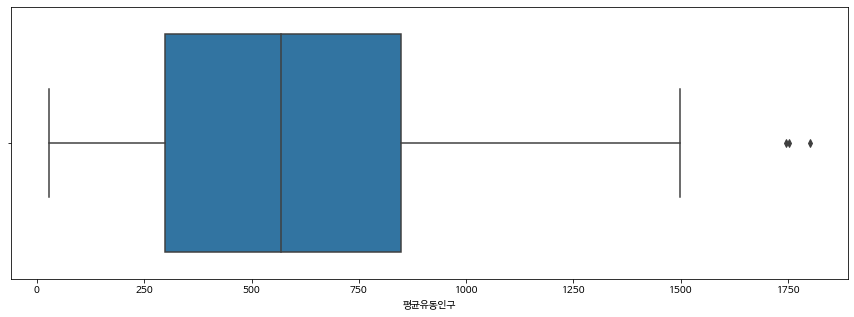

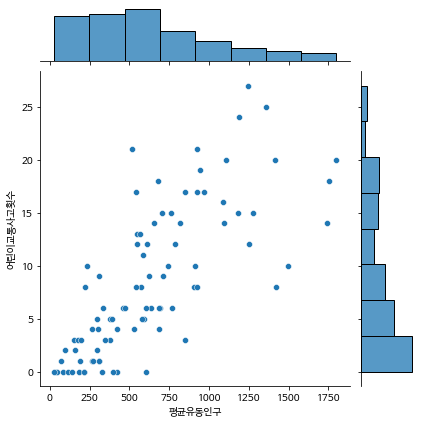

In [46]:
fig, axes = plt.subplots(1, figsize=(15,5))

sns.boxplot(data2['평균유동인구'], ax=axes)

sns.jointplot(data2['평균유동인구'], data2['어린이교통사고횟수'])

In [47]:
x0=0 # 평균유동인구 25% 미만
x1=0 # 평균유동인구 iqr
x2=0 # 평균유동인구 75% 초과
for row in data2.iloc:
  if row['평균유동인구'] < np.percentile(data2['평균유동인구'], 25):
    x0 += row['어린이교통사고횟수']
  elif row['평균유동인구'] > np.percentile(data2['평균유동인구'], 75):
    x2 += row['어린이교통사고횟수']
  else:
    x1 += row['어린이교통사고횟수']

print(x0, x1, x2)

46 349 361


In [48]:
def myfunc2(val):
  if val < np.percentile(data2['평균유동인구'], 25):
    return 0
  elif val > np.percentile(data2['평균유동인구'], 75):
    return 1
  else:
    return 0.8

score['평균유동인구']=data2['평균유동인구'].apply(myfunc2)

### **거주인구_유소년**
* ~25%미만 -> 0
* ~75%이하 -> 1
* 75%초과~ -> 0.8

In [49]:
data2['거주인구_유소년'].describe()

count      90.000000
mean      519.466667
std       458.691133
min         0.000000
25%       159.000000
50%       378.000000
75%       781.500000
max      1671.000000
Name: 거주인구_유소년, dtype: float64

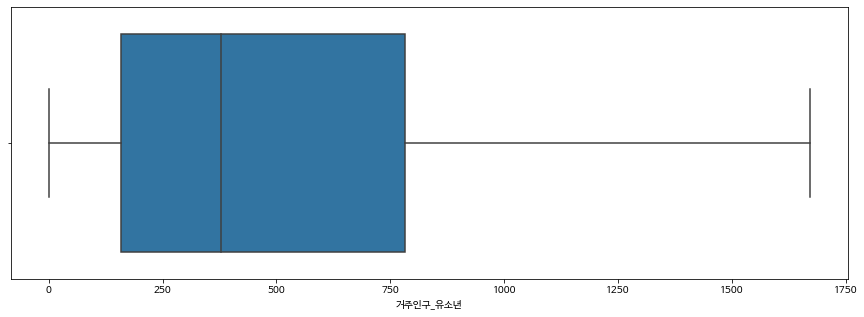

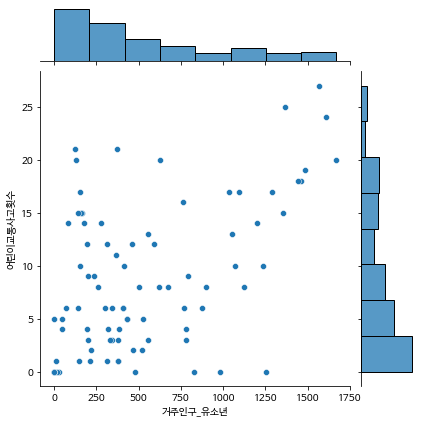

In [50]:
fig, axes = plt.subplots(1, figsize=(15,5))

sns.boxplot(data2['거주인구_유소년'], ax=axes)

sns.jointplot(data2['거주인구_유소년'], data2['어린이교통사고횟수'])

In [51]:
x0=0 # 거주인구_유소년 25% 미만
x1=0 # 거주인구_유소년 iqr
x2=0 # 거주인구_유소년 75% 초과
for row in data2.iloc:
  if row['거주인구_유소년'] < np.percentile(data2['거주인구_유소년'], 25):
    x0 += row['어린이교통사고횟수']
  elif row['거주인구_유소년'] > np.percentile(data2['거주인구_유소년'], 75):
    x2 += row['어린이교통사고횟수']
  else:
    x1 += row['어린이교통사고횟수']

print(x0, x1, x2)

140 318 298


In [52]:
def myfunc3(val):
  if val < np.percentile(data2['거주인구_유소년'], 25):
    return 0
  elif val > np.percentile(data2['거주인구_유소년'], 75):
    return 0.8
  else:
    return 1

score['거주인구_유소년']=data2['거주인구_유소년'].apply(myfunc3)

### **등록차량대수**
* ~25%미만 -> 0
* ~75%이하 -> 1
* 75%초과~ -> 0.8

In [53]:
data2['등록차량대수'].describe()

count      90.000000
mean     1641.033333
std      1183.662251
min        23.000000
25%       793.250000
50%      1466.000000
75%      2072.250000
max      5232.000000
Name: 등록차량대수, dtype: float64

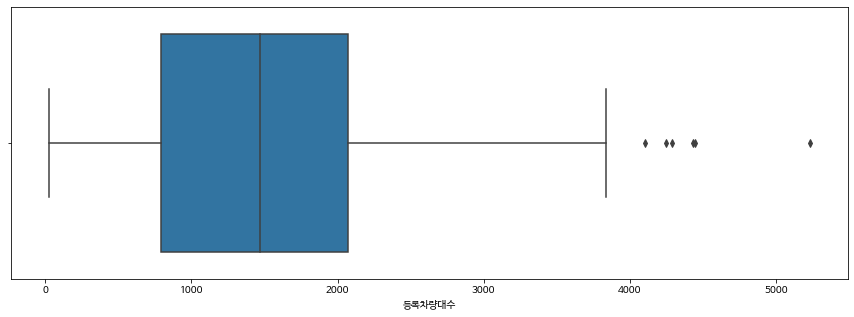

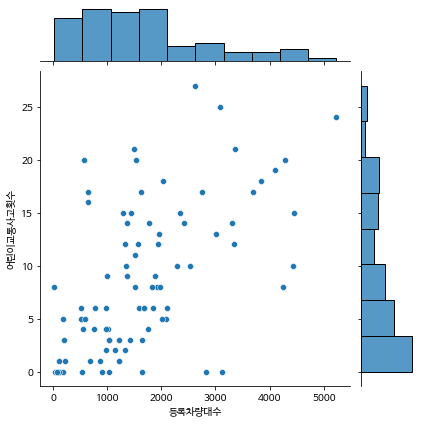

In [54]:
fig, axes = plt.subplots(1, figsize=(15,5))

sns.boxplot(data2['등록차량대수'], ax=axes)

sns.jointplot(data2['등록차량대수'], data2['어린이교통사고횟수'])

In [55]:
x0=0 # 등록차량대수 25% 미만
x1=0 # 등록차량대수 iqr
x2=0 # 등록차량대수 75% 초과
for row in data2.iloc:
  if row['등록차량대수'] < np.percentile(data2['등록차량대수'], 25):
    x0 += row['어린이교통사고횟수']
  elif row['등록차량대수'] > np.percentile(data2['등록차량대수'], 75):
    x2 += row['어린이교통사고횟수']
  else:
    x1 += row['어린이교통사고횟수']

print(x0, x1, x2)

102 334 320


In [56]:
def myfunc4(val):
  if val < np.percentile(data2['등록차량대수'], 25):
    return 0
  elif val > np.percentile(data2['등록차량대수'], 75):
    return 0.8
  else:
    return 1

score['등록차량대수']=data2['등록차량대수'].apply(myfunc3)

### **어린이교통사고횟수**
* 0번 -> 0
* 1번이상 -> 1

In [57]:
data2['어린이교통사고횟수'].describe()

count    90.000000
mean      8.400000
std       7.026115
min       0.000000
25%       3.000000
50%       6.000000
75%      14.000000
max      27.000000
Name: 어린이교통사고횟수, dtype: float64

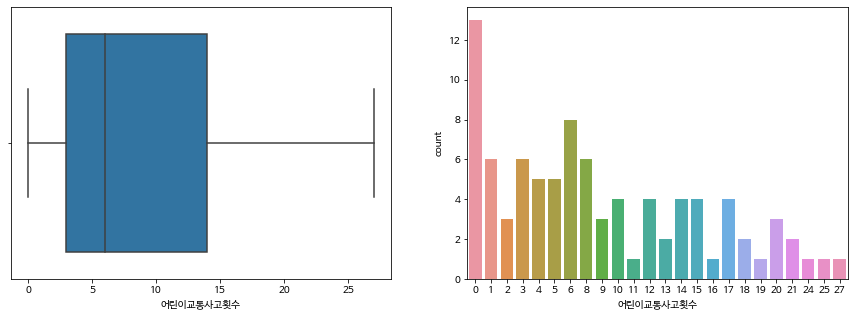

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data2['어린이교통사고횟수'], ax=axes[0])
sns.countplot(data2['어린이교통사고횟수'], ax=axes[1])

In [59]:
score['어린이교통사고횟수']=data2['어린이교통사고횟수'].apply(lambda x: 0 if x==0 else 1)

### **weights 구하기**

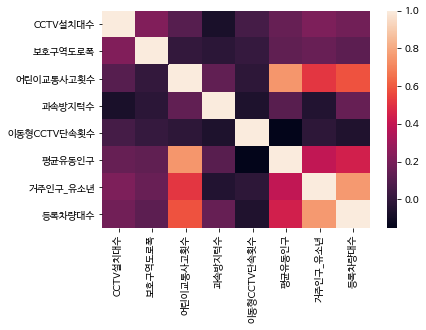

In [60]:
quant_only=data2.drop(['시설명', '보호구역_경도', '보호구역_위도', '시설종류'], axis=1)
sns.heatmap(quant_only.corr())
plt.show()

In [61]:
# 가중치(weights) 딕셔너리 생성 & 어린이교통사고횟수는 가중치 기본으로 줌
temp=quant_only.corr()['어린이교통사고횟수'].sort_values(ascending=False)[1:]
weights=temp[temp>0.10].to_dict()
weights['어린이교통사고횟수']=1

# 가중치에 10 곱하기 & 소수점 2자리 반올림
for w in weights.keys():
  weights[w] = np.round(weights[w]*10, 2)

weights

{'CCTV설치대수': 1.06,
 '거주인구_유소년': 5.16,
 '과속방지턱수': 1.39,
 '등록차량대수': 5.85,
 '어린이교통사고횟수': 10,
 '평균유동인구': 7.5}

In [62]:
sum_col = ['시설종류',	'CCTV설치대수',	'보호구역도로폭',	'과속방지턱수',	'이동형CCTV단속횟수',	'평균유동인구',	'거주인구_유소년',	'등록차량대수', '어린이교통사고횟수']

def score_sum(row):
  s = 0
  for col in sum_col:
    if col in weights.keys():
      s += row[col]*weights[col]
    else:
      s += row[col]
  return s

score['가중치합계']=score.apply(score_sum, axis=1)

### **최종 스코어 데이터프레임**

In [63]:
score.head(10)

,시설명,보호구역_경도,보호구역_위도,시설종류,CCTV설치대수,보호구역도로폭,과속방지턱수,이동형CCTV단속횟수,평균유동인구,거주인구_유소년,등록차량대수,어린이교통사고횟수,가중치합계
0,성심학교,127.017521,37.176762,0.0,0.0,1.0,1.0,1,0.0,0.0,0.0,0,3.390
1,가수초등학교,127.047957,37.148103,0.5,0.2,0.0,1.0,0,0.0,1.0,0.8,1,21.942
2,광성초등학교,127.039709,37.184197,0.5,1.0,0.0,1.0,1,1.0,0.8,0.8,1,30.258
3,대호초등학교,127.057889,37.159106,0.5,0.0,0.0,0.3,0,0.8,1.0,0.8,1,26.757
4,매홀초등학교,127.063282,37.162749,0.5,1.0,0.0,0.3,0,0.8,1.0,0.8,1,27.817
5,삼미초등학교,127.060269,37.191356,0.5,1.0,0.0,1.0,1,0.8,1.0,1.0,1,30.960
6,성산초등학교,127.067040,37.150444,0.5,0.0,0.0,1.0,1,1.0,0.0,0.8,1,25.070
7,성호초등학교,127.070953,37.150478,0.5,1.0,0.0,0.3,0,1.0,0.0,0.8,1,24.157
8,수청초등학교,127.055474,37.170857,0.5,0.0,1.0,1.0,1,0.8,1.0,0.8,1,29.730
9,오산초등학교,127.050165,37.145158,0.5,0.0,0.0,1.0,0,0.0,1.0,0.8,1,21.730


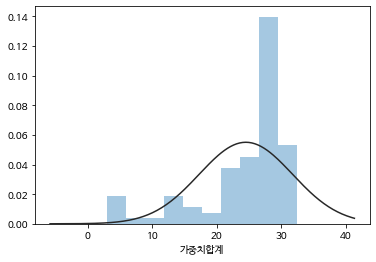

In [64]:
from scipy.stats import norm
sns.distplot(score['가중치합계'], fit=norm, kde=False)

In [65]:
candidates=score.sort_values(by='가중치합계', ascending=False)[:20]['시설명']
candidates

19          금암초등학교
90      세교복지타운어린이집
51        시립가온어린이집
34         동화마을유치원
58        키즈청호어린이집
5           삼미초등학교
86        시립세마어린이집
2           광성초등학교
14          운산초등학교
42          지예뜰유치원
33           이림유치원
8           수청초등학교
49    로뎀장애아전담 어린이집
48        시립매홀어린이집
15          운암초등학교
56         지구촌어린이집
59          영락어린이집
64       구세군샛별어린이집
43    해에게서소년에게어린이집
78         지움 어린이집
Name: 시설명, dtype: object

In [66]:
score.loc[candidates.index]

,시설명,보호구역_경도,보호구역_위도,시설종류,CCTV설치대수,보호구역도로폭,과속방지턱수,이동형CCTV단속횟수,평균유동인구,거주인구_유소년,등록차량대수,어린이교통사고횟수,가중치합계
19,금암초등학교,127.043949,37.178734,0.50,1.0,0.0,1.0,1,1.0,1.0,1.0,1,32.460
90,세교복지타운어린이집,127.044835,37.177752,1.00,0.2,1.0,1.0,1,1.0,0.8,1.0,1,32.080
51,시립가온어린이집,127.077316,37.158869,1.00,0.2,1.0,1.0,1,1.0,1.0,0.8,1,31.942
34,동화마을유치원,127.076416,37.157039,0.25,0.2,0.0,1.0,1,1.0,1.0,1.0,1,31.362
58,키즈청호어린이집,127.083875,37.135319,1.00,0.2,0.2,1.0,1,1.0,1.0,0.8,1,31.142
5,삼미초등학교,127.060269,37.191356,0.50,1.0,0.0,1.0,1,0.8,1.0,1.0,1,30.960
86,시립세마어린이집,127.044916,37.184608,1.00,0.2,0.0,1.0,1,0.8,1.0,1.0,1,30.612
2,광성초등학교,127.039709,37.184197,0.50,1.0,0.0,1.0,1,1.0,0.8,0.8,1,30.258
14,운산초등학교,127.077534,37.152640,0.50,1.0,0.0,1.0,1,1.0,0.8,0.8,1,30.258
42,지예뜰유치원,127.083871,37.137570,0.25,0.2,0.0,1.0,1,1.0,1.0,0.8,1,30.192


In [67]:
# 지도에 시각화
# 동별 경계, 기존 어린이보호구역 포함된 지도 우선 생성
m = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    법정경계_읍면동,
    name = "동 경계",
    style_function=lambda feature: {
        'color': '#000000',
        'weight': 2,
        'opacity':0.2,
    }
).add_to(m)

for line in score.iloc:
  if line['시설명'] in list(candidates):
      folium.Circle(
      location = [line['보호구역_위도'],line['보호구역_경도']],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='purple',
      fill_opacity=0.6,
      tooltip=line['시설명']
).add_to(m)

In [67]:
m

In [68]:
# m.save(save_path+'과제_스코어링_updated.html')